In [75]:
import scipy.io
import numpy as np
import os
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

time-courses for 7 different fMRI tasks

(n_regions, n_timecourses, n_subjects)

379 brain regions, x timecourses, 100 subjects

Easy task = Motor

Task_Paradigms contains, for each subject, the exact temporal details on the presentation of the task.

For instance, the task can have 2 or more conditions, then you will have a block regressor with values going from 0 (no presentation) to the number of conditions. This signal, after being separated into the different conditions and convolved with the hemodynamic response function HRF,  is normally used in the general linear model to assess which voxels activate together with a specific condition. I can give you more details about that during the meeting.

In [12]:
mat = scipy.io.loadmat('./DataMLP/X_tfMRI_MOTOR_LR_Glasser360.mat')
mat_r = scipy.io.loadmat('./DataMLP/TaskParadigms/100307_Regressor_tfMRI_MOTOR_LR.mat')

In [54]:
mat['X'].shape

(379, 284, 100)

In [59]:
mat['X'].reshape(r*n,-1).shape

(28400, 379)

In [65]:
np.column_stack((np.repeat(np.arange(r),n),mat['X'].reshape(r*n,-1)))

(28400, 380)

In [66]:
m, n, r = mat['X'].shape
out_arr = np.column_stack((np.repeat(np.arange(r),n),mat['X'].reshape(r*n,-1)))
out_df = pd.DataFrame(out_arr)

In [106]:
out_df[out_df[0]==0]

,0,1,2,3,4,5,6,7,8,9,...,370,371,372,373,374,375,376,377,378,379
0,0.0,0.807105,1.658802,-2.325641,-0.607838,1.644635,0.093969,1.949395,0.172472,-2.269869,...,0.744282,0.859691,0.089030,1.978966,0.147640,2.539652,-0.007397,-0.001833,-1.494421,0.721210
1,0.0,0.654076,0.182824,1.058906,-0.009666,-0.011193,-1.634491,0.811948,-0.609627,0.152989,...,-0.399454,0.259975,-0.208008,-2.269232,0.616907,-0.645915,-0.181351,-0.340194,-1.797882,0.666040
2,0.0,0.230697,0.474688,-0.940563,0.667009,0.399036,-1.073687,0.683108,-0.777368,-0.316032,...,-0.087023,1.099545,-1.017220,0.841930,-0.467996,-0.498588,-0.919540,-0.424412,-1.209621,-0.016962
3,0.0,-1.457616,-0.815395,-0.275543,-1.300151,-1.434553,-0.152496,1.159170,0.255572,-0.738488,...,0.425893,0.600351,-0.854726,-0.408485,-1.014162,-0.635804,0.767114,0.231516,-0.567377,-0.408341
4,0.0,1.183907,1.376099,0.651361,-0.110081,0.328527,-0.531072,-0.293724,-0.575285,0.772209,...,0.728914,1.126086,1.084930,1.780652,1.309559,0.222353,0.793556,2.113272,1.112033,0.946341
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279,0.0,-0.341021,-2.168678,-0.277480,-1.349702,1.859058,-1.129341,-0.458180,-1.071196,-2.001867,...,0.100924,0.585402,-1.773082,1.274377,-0.120351,-0.502021,-0.399903,-0.886139,0.073951,-0.668868
280,0.0,-0.374933,-1.292183,-0.880796,1.615220,0.190341,-0.369668,1.306479,-0.463767,2.039486,...,-0.919627,-1.752525,-1.227026,-0.674358,-1.856441,-0.718702,0.285381,-2.170203,0.607351,0.803954
281,0.0,-0.126305,-0.666360,-1.430430,-0.433990,-1.189054,0.716505,-0.266672,0.371331,-1.733341,...,0.260429,0.271810,-0.110429,0.841758,-0.702467,-0.332797,-0.456104,-0.429257,0.497898,0.019856
282,0.0,-1.044375,-0.112874,0.316442,-1.602473,-1.233853,-0.856018,-1.338326,-0.135525,0.441614,...,0.379691,-1.415484,-0.247511,-1.966872,-1.202208,-0.772341,0.797915,-0.682605,0.887951,-0.583211


In [101]:
out_df[out_df[0]==0].iloc[:,1:10].corr()

,1,2,3,4,5,6,7,8,9
1,1.000000,0.146987,0.199093,0.052569,0.142289,0.146171,0.191359,0.013633,0.141974
2,0.146987,1.000000,0.115013,0.076014,0.063188,0.145716,0.096102,0.006248,0.173944
3,0.199093,0.115013,1.000000,0.133226,0.035010,0.121331,0.085430,0.126834,0.108373
4,0.052569,0.076014,0.133226,1.000000,0.069078,0.087179,0.150059,0.077264,0.128973
5,0.142289,0.063188,0.035010,0.069078,1.000000,0.070609,0.088740,0.038428,0.059196
6,0.146171,0.145716,0.121331,0.087179,0.070609,1.000000,0.158635,0.143636,0.055283
7,0.191359,0.096102,0.085430,0.150059,0.088740,0.158635,1.000000,0.150522,0.163927
8,0.013633,0.006248,0.126834,0.077264,0.038428,0.143636,0.150522,1.000000,0.097010
9,0.141974,0.173944,0.108373,0.128973,0.059196,0.055283,0.163927,0.097010,1.000000


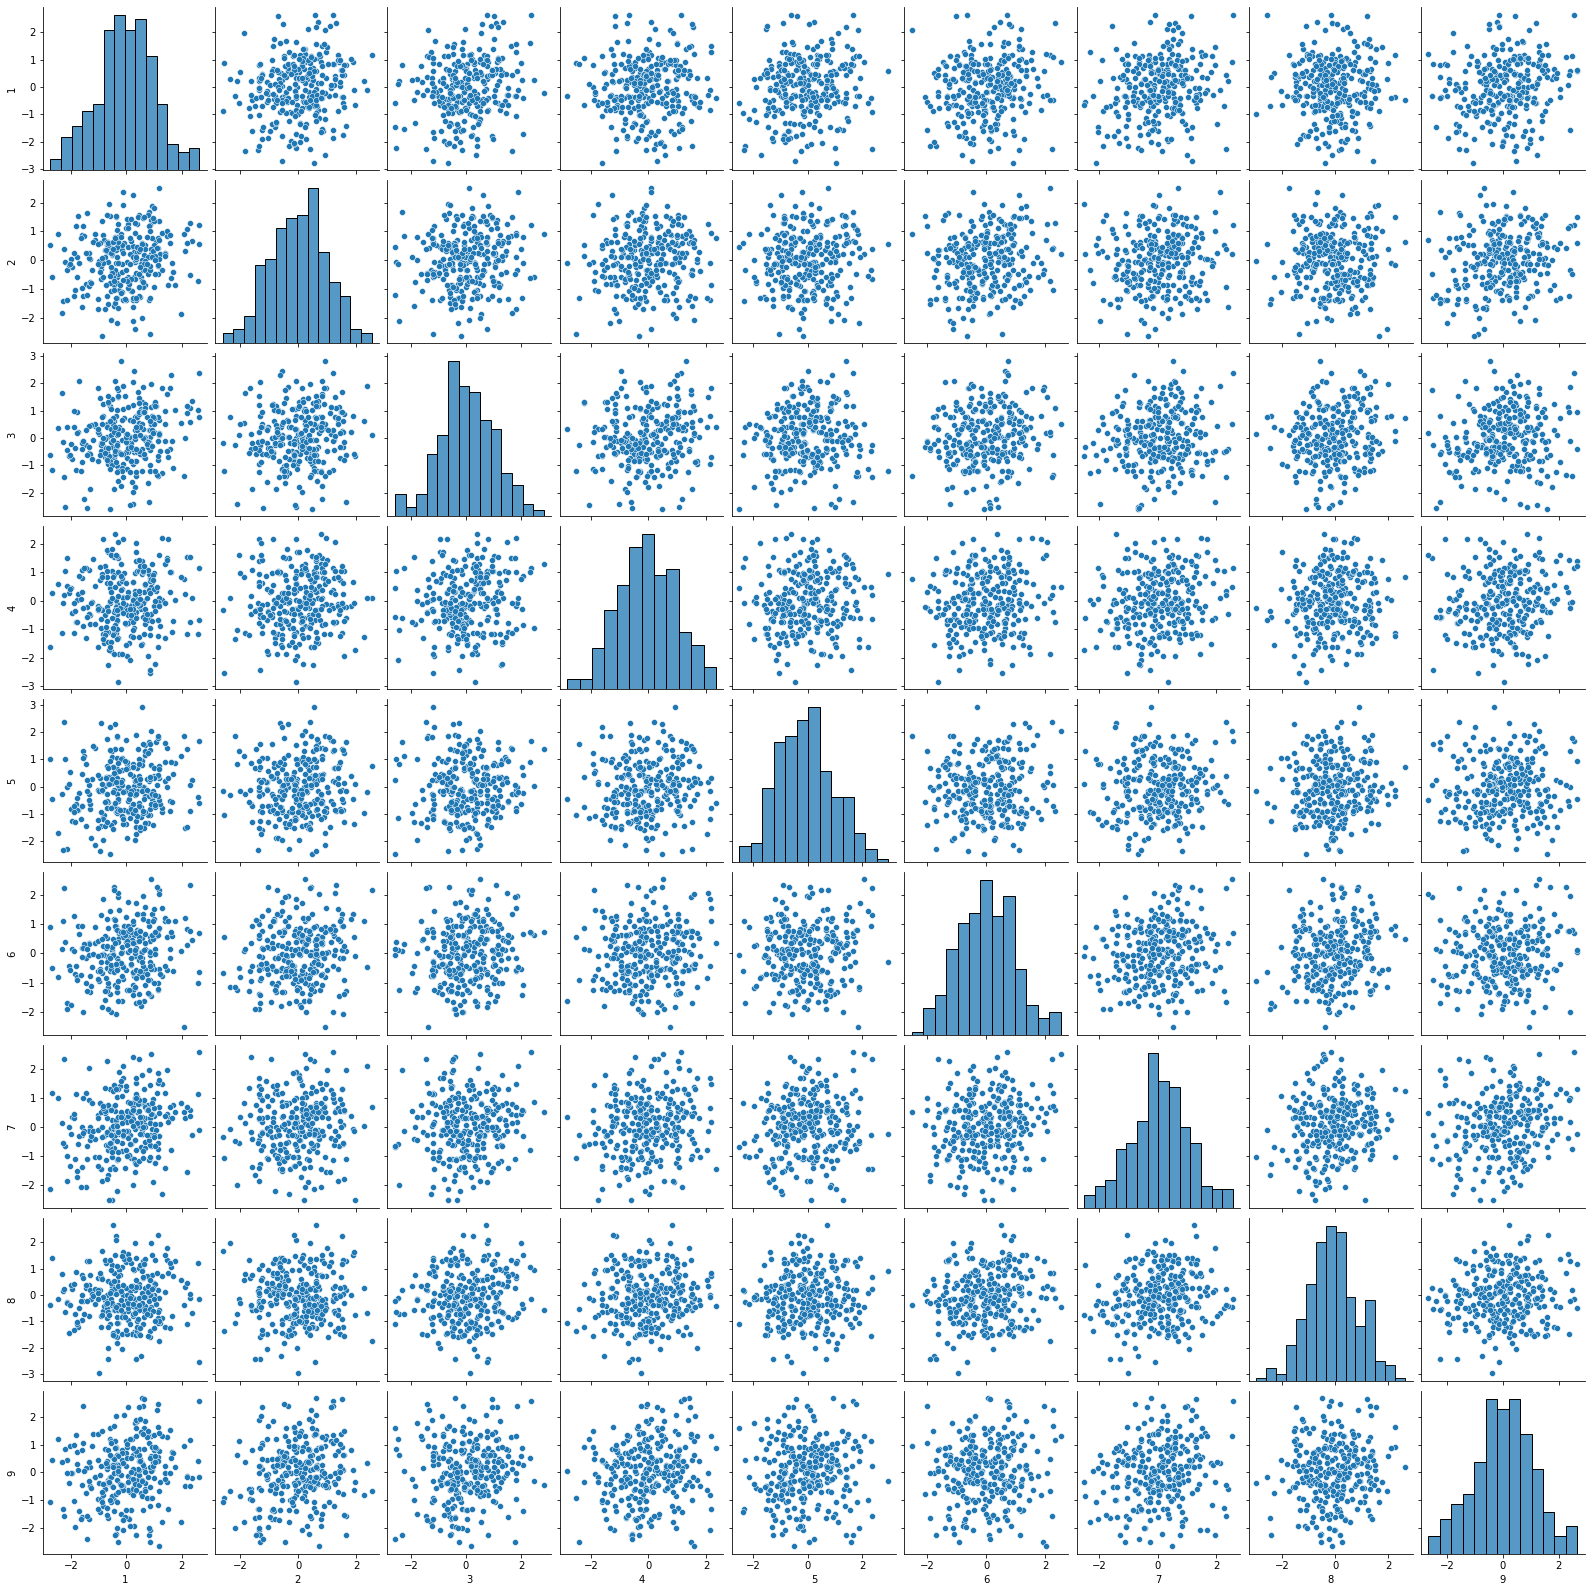

In [102]:
sns.pairplot(out_df[out_df[0]==0].iloc[:,1:10])

<AxesSubplot:>

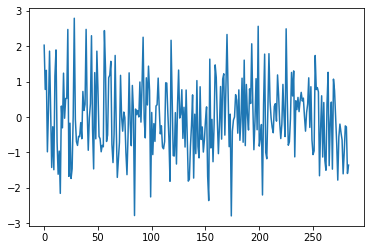

In [87]:
out_df[out_df[0]==0].iloc[:,100].plot()

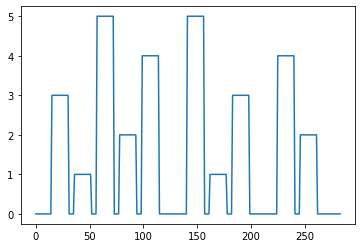

In [93]:
plt.plot(np.arange(0,284,1),mat_r['Regressor'].T)

In [105]:
mat_r['Regressor']

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 3, 3, 3, 3, 3, 3,
        3, 3, 3, 3, 3, 3, 3, 3, 3, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 5, 5, 5, 5, 5, 5, 5, 5, 5,
        5, 5, 5, 5, 5, 5, 5, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
        4, 4, 4, 4, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
        5, 5, 5, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 0, 0, 0, 0, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
        3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 0,
        0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]],
      dtype=uint8)

Need to one hot encode the task paradigm data and tie that to the time 
Same model for all voxels but different parameter values
Regression is ordinary least squares -> just use statsmodel?
Try linear combinations of parameters
t = effect size / uncertanty of size
Get data - get model - get weights - get error - contrast - effect size - uncertanty
Hypothesis Test : H0 = No expression
    - Use student t-distribution

Next analyze over the group vs just one subject

Other things to try:
-Smoothing / wavelets
-generalized linear models (non-gaussian densities)
**-non parametric tests**

Popular to do independent component analysis


Note:
General Linear Model Assumptions
Assumptions
fixed impulse response
however, inter-subject variability [Aguirre et al., 1998]
stationarity
space
all brain regions respond the same way
however, intra-subject variability [Schacter et al., 1997]
time
all responses are the same
however, effects from habituation, anticipation, and “background” state
superposition
response to separate events simply sum up
however, in practice non-linear effects (saturation) and interaction


Refinements:

Eliminate low-frequency components
due to
aliased cardiac and respiratory cycle
scanner drift
low-frequency regressors
discrete cosine transform basis set
acts as a high-pass filter
hidden in SPM’s design matrix!
Add motion parameters as regressors
Go beyond “white noise” assumption
SPM: auto-regressive model order 1, AR(1)

In [55]:
DIRECTORY = './DataMLP/TaskParadigms'
FILE = 'MOTOR_LR.mat'


regressor_list = []
for filename in os.listdir(DIRECTORY):
    if filename.endswith(FILE):
        task = scipy.io.loadmat(DIRECTORY+filename)
        
        
print(i)

147737_Regressor_tfMRI_MOTOR_LR.mat
127630_Regressor_tfMRI_MOTOR_LR.mat
123925_Regressor_tfMRI_MOTOR_LR.mat
118528_Regressor_tfMRI_MOTOR_LR.mat
212318_Regressor_tfMRI_MOTOR_LR.mat
131722_Regressor_tfMRI_MOTOR_LR.mat
103111_Regressor_tfMRI_MOTOR_LR.mat
110411_Regressor_tfMRI_MOTOR_LR.mat
126325_Regressor_tfMRI_MOTOR_LR.mat
188347_Regressor_tfMRI_MOTOR_LR.mat
101309_Regressor_tfMRI_MOTOR_LR.mat
128127_Regressor_tfMRI_MOTOR_LR.mat
190031_Regressor_tfMRI_MOTOR_LR.mat
149741_Regressor_tfMRI_MOTOR_LR.mat
130316_Regressor_tfMRI_MOTOR_LR.mat
135932_Regressor_tfMRI_MOTOR_LR.mat
366446_Regressor_tfMRI_MOTOR_LR.mat
156637_Regressor_tfMRI_MOTOR_LR.mat
654754_Regressor_tfMRI_MOTOR_LR.mat
199655_Regressor_tfMRI_MOTOR_LR.mat
298051_Regressor_tfMRI_MOTOR_LR.mat
163129_Regressor_tfMRI_MOTOR_LR.mat
133019_Regressor_tfMRI_MOTOR_LR.mat
792564_Regressor_tfMRI_MOTOR_LR.mat
122620_Regressor_tfMRI_MOTOR_LR.mat
103818_Regressor_tfMRI_MOTOR_LR.mat
115320_Regressor_tfMRI_MOTOR_LR.mat
176542_Regressor_tfMRI_MOTOR